# Funcion de costo para SVM


Tenemos una coleccion de puntos $x^{(1)}, x^{(2)}, \cdots, x^{(m)}$. Por ejemplo en 2D, $(x_1, x_2)^{(1)}, (x_1, x_2)^{(2)}, \cdots , (x_1, x_2)^{m} $,
asumiento que estamos en $\mathbb{R}^2$. Asociados a estos puntos tenemos etiquetas $y^{(1)}, y^{(2)}, \cdots, y^{(m)} $. Inicialmente pensamos en caso binario $y^{(i)} = \pm 1$.

El hiperplano (en 2D es una recta, en 3D es un plano, en 4,5, un hiperplano)
\begin{eqnarray}
x_2 &=& a x_1 - b \\
0 &=& a x_1 - x_2 - b \\
0 &=&  \begin{pmatrix}  a \\ -1
\end{pmatrix}^T \begin{pmatrix}  x_1 \\ x_2 \end{pmatrix} - b
\end{eqnarray}

La generalizacion de esta ecuacion es:
$$ 0 = w^T x - b$$, $w \in \mathbb{R}^n$, $x \in \mathbb{R}^n$. 
Esta es la ecuacion del hiperplano que divide los dos puntos. 

Para alejarnos un poco de este plano generalizamos
$\delta = w^T x - b $,  $\delta >0$. Si $\delta=0$ nos limitamos al plano central. 
Los puntos a lado y lado el hiperplano se dividen en dos $y^{(i)}= \pm 1$.

Mas concretamente
\begin{eqnarray}
w^T x^{(i)} - b > 0  \quad , \quad \text{ si  } y^{(i)} = 1  \\
w^T x^{(i)} - b < 0  \quad , \quad \text{  si } y^{(i)} = -1
\end{eqnarray}

Podemos escribir en vez#

\begin{eqnarray}
w^T x^{(i)} - b  &=& \delta  \quad , \quad \text{ si  } y^{(i)} = 1  \\
w^T x^{(i)} - b  &=& - \delta   \quad , \quad \text{  si } y^{(i)} = -1
\end{eqnarray}

Estas dos ecuaciones se pueden escribir de forma compacta en una sola
$$ y^{(i)} ( w^T x^{(i)} - b ) = \delta $$
La distancia entre las lineas donde se localizan los vectores de soporte es
$$ \frac{2 \delta}{\| w \|}$$
Es conveniente escoger $\delta =1$. Si hay duda de que $\delta$ pueda valer
uno piense en las ecuaciones de arriba, dividiendo por $\delta$ y asignando
un nuevo $w \leftarrow w/\delta, b \leftarrow b/\delta $
La ecuacion queda
$$y^{(i)} ( w^T x^{(i)} - b ) = 1 $$
Para incluir todos los puntos del conjunto , por seguridasd podemos escribir
$$y^{(i)} ( w^T x^{(i)} - b ) \ge 1 $$


El problema de optimizacion consite en hacer $2/\| w \|$ tan grande como sea posible. Sin embargo maximar algo tambien maximizar el cuadrado y estmos acostumbrar a usar la norma al cuadrado (tene la ventaja de que no hay raiz cuadrada), podemos pensar en maximizar $2/\| w \|^2$. Pero estamos ensenados tambien a buscar el minimo y no el maximo. El problema que tenemos que resolver es:

$$\min_w  \frac{\| w \|^2}{2}  \text{   sujeto a la condicion  } y^{(i)}( w^T x^{(i)} - b ) \ge 1 $$










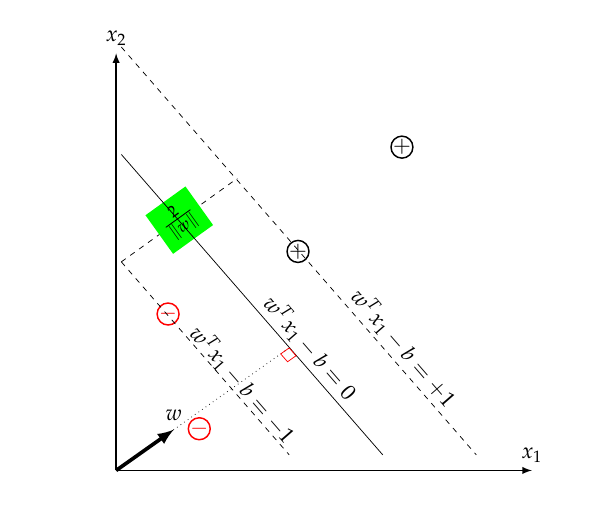

Este es un problema de multiplicadores de Lagrange. Pero se usa desigualdad en vez de igualdad el problema se conoce como KKT: Karush-Kuhn-Tucker. 
Vamos a transforma la ecuacion de costo a formas mas convenientes.

Podemos escribir
$$ J(w) = \frac{\| w \|^2}{2}  + C \sum_{i=1}^m (1 - y^{(i)} [ w^T x^{(i)} - b] )  $$

$C > 0$ balancea las dos partes de la ecuacion.

Los puntos que estan en el lado correcto de la frontera contribuyen con un
valor negativo a la suma. Esto no importa mucho por que son los puntos
que estan en el lado incorrecto los que hay penalizar y estos contribuyen
a la suma con un valor positivo. Entonces, a los puntos que estan en el 
lado correcto les asignamos cero, y solo penalizamos con un valor positivo aqueyos que estan en lado incorrecto.  Esto llama a  la siguiente funcion

$$ \max ( 0,  (1 - y^{(i)} [ w^T x^{(i)} - b] ) ) $$

Esto me llama a un cambio de la funcion objetivo

$$ J(w) = \frac{\| w \|^2}{2}  + C \sum_{i=1}^m \max ( 0,  (1 - y^{(i)} [ w^T x^{(i)} - b] ) )  $$


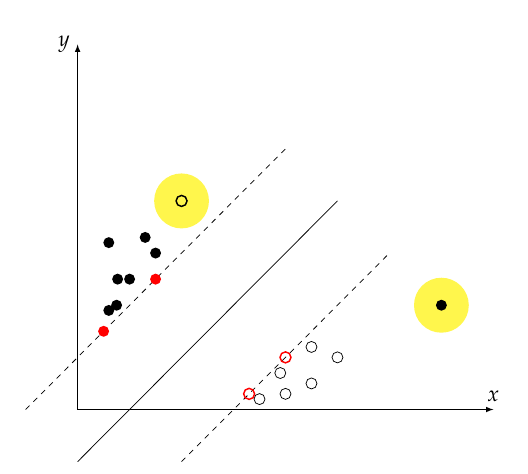

Miremos el problema de otra forma. Introducimos el concepto de slack variable $\zeta^{(i)}$, Vamos a formula el problema como#
$$ \min \frac{\| w \|^2}{2} + D \sum_{i=1}^m \zeta^{(i)} $$
sujeto a la condicion

$$ y^{(i)} ( w^T x^{(i)} - b ) \ge 1 - \zeta^{(i)}  \quad i=1,2, \cdots, m$$
$$ \zeta^{(i)} \ge 0 $$

La frontera que estas "slack variables" encuentre se le llama "suave" (soft) .
Si $\zeta^{(i)} = 0$ el problema se reduce al problema de arriba y la frontera
seria "dura" (hard). 


El hecho de que $\zeta^{(i)} \ge 0$ nos produce mas flexibildad para obrar.
Veamos esto de forma matematica#
\begin{eqnarray}
y^{(i)} &=& 1 \\ 
w^T x^{(i)}  - b &=& 1 - \zeta^{(i)} \\
w^T x^{(i)} &=& 1 + b - \zeta^{(i)} 
\end{eqnarray}


\begin{eqnarray}
y^{(i)} &=& -1 \\ 
w^T x^{(i)}  - b &=& -1 + \zeta^{(i)} \\
w^T x^{(i)} &=& -1 + b  + \zeta^{(i)} 
\end{eqnarray}

La distancia entre esos dos hiperplanos es
$$ \frac{2 - 2 \zeta^{(i)}}{\| w \| } $$

Hay una nota interesante:

Si definimos $\zeta^{(i)}$ como
$$ z^{(i)} = \max ( 0, 1 - y^{(i)} (w^T x^{(i)} - b )), $$

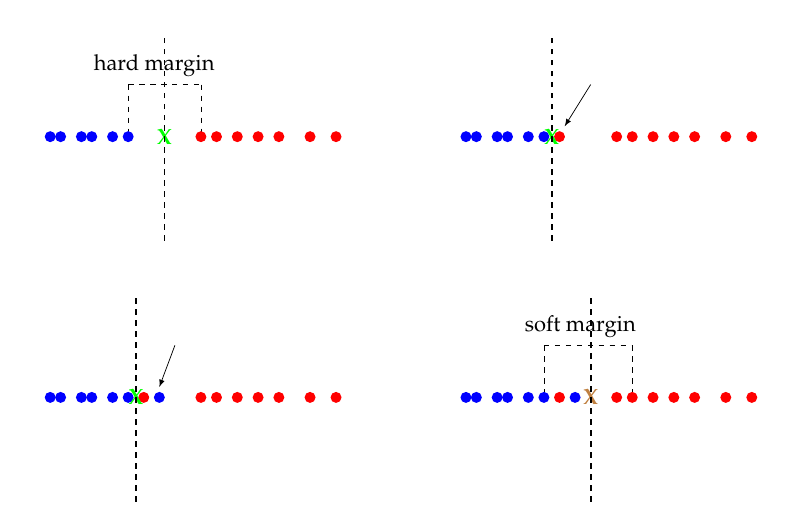

In [ ]:
8:50 pm

# La relacion entre la regresion logistica y SVM a traves de las funciones de costo

Comenzamos con la hipotesis logistica#
$$ h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-x^T \theta}} $$
queremos que esto sea $y$.

Es intersante saber que cuando $x^T \Theta \gg 0$, esto produciria un $y=1$.
De otro lado si $x^T \theta \ll 0$ produciria $y=0$.

La funcion de costo para regresion logistica es#
$$ J(\theta, x^{(i)}) = -y^{(i)} \log h(\theta, x^{(i)})  - (1 - y^{(i)}) \log (1 - h(\theta, x^{(i)})  $$

Reemplazando por $h(\theta, x) $ la funcion sigmoid logistica

$$ J(\theta, x^{(i)} ) = - y^{(i))} \log \frac{1}{1 + \mathrm{e}^{- (x^{(i)})^T \theta}} - (1 - y^{(i)}) \log \left ( 1 - \frac{1}{1 + \mathrm{e}^{- (x^{(i)})^T \theta}}
  \right )  $$

Si $y^{(i)}=1$, se pierde el segundo termino y queda#


$$f_1(z) = - \log \frac{1}{1 + \mathrm{e}^{-z}}  \quad , \quad \text{ donde } z = x^T \theta $$



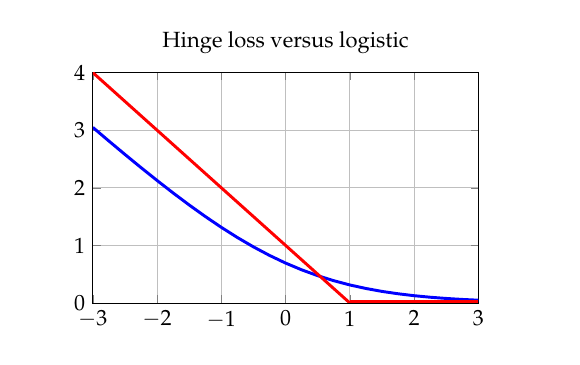

De Andrew Ng aprendi que la funcion $f_1(z)$ (azul en la grafica) se puede aproximar con la fucion

$$\text{cost}_1(z) = \left \{ \begin{array}{cc} 0  & \text{si  } z \ge 1 \\
1 - z  & \text{   si } z < 1 \end{array}   \right . $$, esta es la funcion
roja en la grafica. 


El otro caso es $y=0$.

$$ f_0(z) =  -\log \left ( 1 - \frac{1}{1 + \mathrm{e}^{- z}}
  \right )  \quad , \quad \text{donde   } z = x^T \theta $$

De Andrew Ng, resulta la aproximacion#

$$\text{cost}_0(z) = \left \{
  \right .   \begin{array}{cc} 0 & \text{ si  } z \le -1  \\
  z+1   & \text{ de lo contrario }
  \end{array} $$



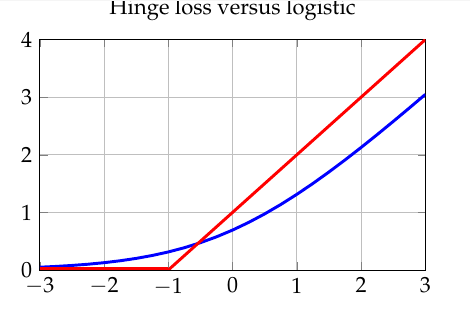

La funcion de costo para la regresion logistica es


$$ J(\theta, x) = \frac1m \sum_{i=1}^m  y^{(i)} \left ( - \log h(\theta, x^{(i)} ) \right )  + (1 - y^{(i)})  \left ( - \log (1 - h(\theta , x^{(i)}) \right )  + \frac{\lambda}{2m}  \sum_{j=1}^m \theta_j^2 $$

Vamos a reemplazar las ramas logaritmicas por las funciones de costo aproximadas (bisagras izquierda y derecha ), quedaria


$$J(\theta , x ) = \frac1m  \sum_{i=1}^m  y^{(i)} \text{cost}_1 ( (x^{(i)})^T \theta ) + (1 - y^{(i)} ) \text{cost}_0 ( (x^{(i)})^T \theta ) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2  $$

Reformlamos este problema con $C=1/\lambda$ . Dividimos por $\lambda$ (esto no cambia el lugar del optimo), quitamos el $1/m$ (esto tampoco el optimo) y 
obtenemos el problema

$$ \min_{\theta} C  \sum_{i=1}^m  y^{(i)} \text{cost}_1 ( (x^{(i)})^T \theta ) + (1 - y^{(i)} ) \text{cost}_0 ( (x^{(i)})^T \theta ) + \frac12 \sum_{j=1}^n \theta_j^2  $$

Un ejemplo donde se optimiza y se separan los puntos lo muestra la grafica siguiente




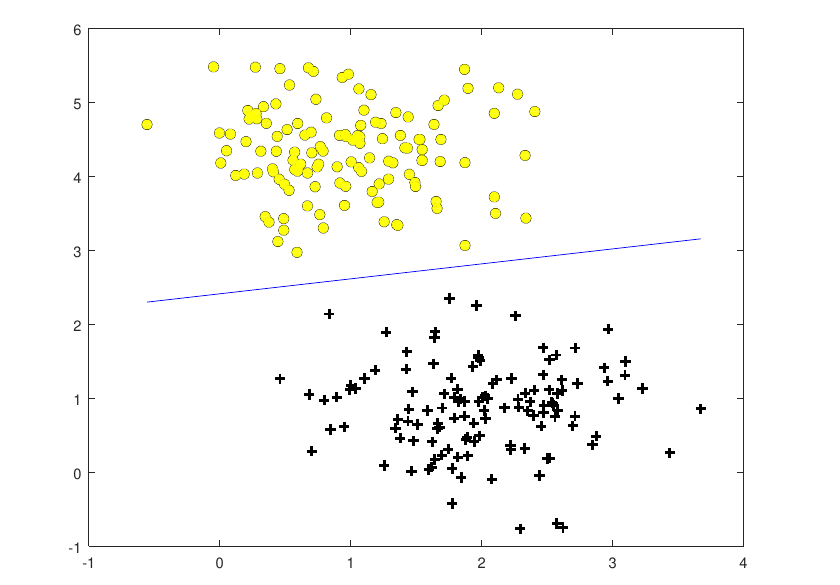

El algoritmo para esta grafica es svmTrain.m (lo van a tener disponible en la proxima tarea.


Un analisis interesante:


Que tal si $y^{(i)} = 1$ y $( x^{(i)})^T \ge 1$ entonces solo quedamos con 
$$ \frac12 \sum_{j=1}^m \theta_j^2$$

La otra posibilidad es que $y^{(i)} = 0$. Ademas que $(x^{(i)})^T \theta \le -1$.
Obtenemos 

$$ \frac12 \sum_{j=1}^m \theta_j^2$$


En resumen tenemos#

Queremos resolver el problema:        

\begin{eqnarray}
\min_{\theta}  \frac12 \sum_{j=1}^m \theta_j^2  \\
( x^{(i)})^T \theta  \ge 1   \quad , \quad \text{para     } y^{(i)} = 1 \\
(x^{(i)})^T \theta < -1    \quad , \quad \text{para     } y^{(i)} = 0  
\end{eqnarray}


Vamos a redefinir

$$ x \leftarrow  \begin{pmatrix} 1  \\ x \end{pmatrix} $$
$$ \theta = \begin{pmatrix}  -b  \\ w \end{pmatrix} $$
Reescribimos la ecuacion de arriba como#


\begin{eqnarray}
w^T x^{(i)} - b \ge 1  \quad , \quad y^{(i)} = + 1  \\
w^T x^{(i)} - b < -1  \quad , \quad y^{(i)} = 0 
\end{eqnarray}